### Import Libraries

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

### Data Creation
- We draw $950$ data points from a Normal distribution with $\mu=0$ and $\sigma=1$
- We draw $50$ data points from a Normal distribution with $\mu=4$ and $\sigma=1$
- We then concatenate the $950$ and $50$ data points together to obtain a dataset.
- We finally reshape the dataset such that it has one column.

In [2]:
np.random.seed(20)
data =np.concatenate([np.random.normal(0,1,950),np.random.normal(4,1,50)])
data.shape

(1000,)

In [3]:
data=data.reshape(-1,1)

In [4]:
data.shape

(1000, 1)

- Here we create a mesh-grid of dimension $1000 \times 1$.
- Each point in the meshgrod is equally spaced between the maximum and minimum value in the data
- We want to calculate the density at each of these $1000$ grid points with respect to the training data we generated

In [5]:
x_vals = np.linspace(min(data),max(data),1000).reshape(-1,1)

In [6]:
x_vals.shape

(1000, 1)

### Kernel Desnsity Function
At this point we designed our kernel function. We used $1$-dimensional Gaussian Kernel function which is expressed mathematically as:
$$
k(v)=\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}v^2}
$$
where $-\infty <v < \infty$. Thereafter, we calculate the Kernel density at some point $x$ in the $1$-dimensional space using the formula:
$$
f(x)=\frac{1}{nh}\sum_{i=1}^{n}k(\frac{x_i-x}{h})
$$
where $x_i$ is the data that is used to calculate the density at point $x$. Thereafter, we calculate the density $f(x)$ for each data point $x$ in our meshgrid with respect to the $1000$ data points that we had generated.

In [7]:
def k(xi,x,h):
    v=((xi-x)/h)
    exponent = (-1/2)*(v**2)
    e= np.exp(exponent)
    c=  e*(1/np.sqrt(2*np.pi))
    return c

In [8]:
def fun(x_vals,data,h):
    f=[]
    for x in x_vals:
        s=0
        for xi in data:
            s=s+k(xi,x,h)
        s=s/(h*len(data))
        f.append(s)
    return f

In [9]:
densities = fun(x_vals,data,1.0)

In [10]:
len(densities)

1000

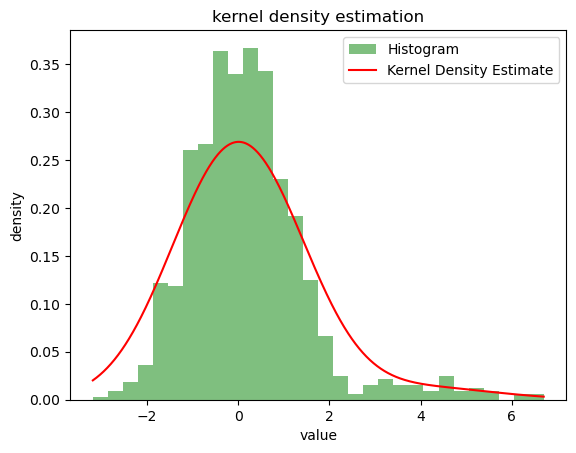

In [11]:
#plot the original data and the KDE estimate
plt.hist(data, bins=30 ,density=True,alpha=0.5,color='green',label='Histogram')
plt.plot(x_vals,densities,color='red',label='Kernel Density Estimate')
plt.legend()
plt.title('kernel density estimation')
plt.xlabel('value')
plt.ylabel('density')
plt.show()

## Class-wise Kernel Density calculation

- Recall that we created our dataset such that $950$ points were drawn from one Gaussian distribution and $50$ points were drawn from another Gaussian distribution. So, we can treat our data as a imbalanced binary class data with the majority class having $950$ points and the minority class having $50$ data points. We then calculate the densities of the $1000$ mesh grid points with respect to the $950$ data points from one class and $50$ data points from another class separately. This gives us two seperate density values for each of the $1000$ mesh grid points which we later visualize.

In [12]:
densities_1 = fun(x_vals,data[:950],1.0)

In [13]:
densities_2 = fun(x_vals,data[950:],1.0)

In [14]:
density_sum=[]
for i in range(len(densities_1)):
    density_sum.append(.5*densities_1[i]+.5*densities_2[i])
density_sum=np.array(density_sum)

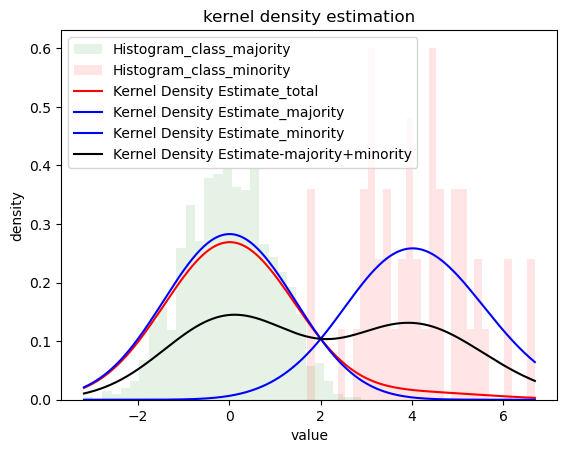

In [15]:
#plot the original data and the KDE estimate
plt.hist(data[:950], bins=30 ,density=True,alpha=0.1,color='green',label='Histogram_class_majority')
plt.hist(data[950:], bins=30 ,density=True,alpha=0.1,color='red',label='Histogram_class_minority')
plt.plot(x_vals,densities,color='red',label='Kernel Density Estimate_total')
plt.plot(x_vals,densities_1,color='blue',label='Kernel Density Estimate_majority')
plt.plot(x_vals,densities_2,color='blue',label='Kernel Density Estimate_minority')
plt.plot(x_vals,density_sum,color='black',label='Kernel Density Estimate-majority+minority')


plt.legend()
plt.title('kernel density estimation')
plt.xlabel('value')
plt.ylabel('density')
plt.show()